In [ ]:
!pip install eo-learn-core==0.8.0
!pip install eo-learn-io==0.8.0

In [2]:
!git clone https://github.com/mickerott/tempcnn-example-sentinel2

Cloning into 'tempcnn-example-sentinel2'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 2), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [4]:
# add tempcnn-example-sentinel2 to PATH variable
import sys
from pathlib import Path
sys.path.append(str(Path('tempcnn-example-sentinel2').resolve()))

In [ ]:
import urllib
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import rasterio

In [171]:
# # only during dev
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## tempcnn-example-sentinel2
multivariate sits classification with temporal convolutional networks
example with Sentinel-2 data

## extract-images (now eolearn, later aws)
## pre-processing (mask clouds and interpolate)
## get reference data
## load pre-processed data
## time series visualization
## build tempcnn and fit
## predict map



## pre-processing (mask clouds and interpolate)

In [8]:
# # load reference data
# import urllib
# lclu_slovenia = 'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/maps/si_lulc_reference.tiff'
# urllib.request.urlretrieve(lclu_slovenia, 'labels.tif')
# with rasterio.open('labels.tif') as src:
#   class_labels = src.read()
# class_labels.shape

In [ ]:
# !pip install eo-learn-features

In [169]:
# def preprocessing(images, masks):
#     """
#     Pre-processing of image time series: 1. Masking of clouds, 2. Temporal resampling through linear interpolation.
#     """
#     ##### DUMMY: load pre-extracted eolearn data #####
#     from eolearn.core import EOPatch, FeatureType
#     from eolearn.io import ExportToTiff
#     # load image data
#     patch_name = 'eopatch_id_102_col_7_row_9'
#     eo_slovenia = [
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/data/BANDS.npy.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/mask/IS_VALID.npy.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/bbox.pkl.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/meta_info.pkl.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/timestamp.pkl.gz'
#     ]
#     for fp in eo_slovenia:
#         out_path = Path('.').resolve() / '/'.join(fp.split('/')[3:])
#         if out_path.is_dir():
#             out_path.mkdir(parents=True, exist_ok=True)
#         else:
#             out_path.parent.mkdir(parents=True, exist_ok=True)
#         if not out_path.exists():
#             urllib.request.urlretrieve(fp, out_path)[0]
      
#     eo_path = str(Path('.').resolve() / fp.split('/')[3] / patch_name)
#     print(eo_path)

#     patch = EOPatch.load(eo_path)

#     # linear interpolation of full time-series and date resampling
#     from eolearn.features import LinearInterpolation
#     resampled_range = ('2019-01-01', '2019-12-31', 10)
#     linear_interp = LinearInterpolation(
#         'BANDS', # name of field to interpolate
#         mask_feature=(FeatureType.MASK, 'IS_VALID'), # mask to be used in interpolation
#         resample_range=resampled_range # set the resampling range
#     )
#     patch = linear_interp.execute(patch)
#     patch.data['BANDS'] = (patch.data['BANDS']*255).astype('uint8')

#     # subset, manipulate bbox
#     from sentinelhub import BBox, CRS
#     patch.bbox = BBox([405000+3500, 5070000+3250, 410000-500, 5075000-750], crs=CRS.UTM_33N)
#     patch.data['BANDS'] = patch.data['BANDS'][:, 75:175, -150:-50, :]

#     input_list = []
#     for i, band_name in enumerate(['B02', 'B03', 'B04', 'B08', 'B11', 'B12']):
#         feature = (FeatureType.DATA, 'BANDS')
#         out_dir = 'gdrive/MyDrive'
#         export_task = ExportToTiff(feature, folder=out_dir, band_indices=[i], 
#                                    date_indices=[d for d in range(patch.data['BANDS'].shape[0])],
#                                   compress='lzw')
#         fn = f'{band_name}.tif'
#         export_task.execute(patch, filename=fn)
#         input_list.append(str(Path(out_dir).resolve()  / fn))
#     ##### END of DUMMY: load pre-extracted eolearn data #####

#     return input_list

# input_list = preprocessing(images=images, masks=None)

/content/eopatches_slovenia_2019/eopatch_id_102_col_7_row_9
['/content/gdrive/MyDrive/B02.tif', '/content/gdrive/MyDrive/B03.tif', '/content/gdrive/MyDrive/B04.tif', '/content/gdrive/MyDrive/B08.tif', '/content/gdrive/MyDrive/B11.tif', '/content/gdrive/MyDrive/B12.tif']


## get reference data

In [167]:
def get_reference_data(filepath, bbox):
    # ##### DUMMY: load from eolearn patch #####
    # from eolearn.core import EOPatch, FeatureType
    # from eolearn.io import ExportToTiff
    # # load image data
    # patch_name = 'eopatch_id_102_col_7_row_9'
    # eo_slovenia = [
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/mask_timeless/LULC.npy.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/bbox.pkl.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/meta_info.pkl.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/timestamp.pkl.gz'
    # ]
    # for fp in eo_slovenia:
    #     out_path = Path('.').resolve() / '/'.join(fp.split('/')[3:])
    #     if out_path.is_dir():
    #         out_path.mkdir(parents=True, exist_ok=True)
    #     else:
    #         out_path.parent.mkdir(parents=True, exist_ok=True)
    #     if not out_path.exists():
    #         urllib.request.urlretrieve(fp, out_path)[0]
      
    # eo_path = str(Path('.').resolve() / fp.split('/')[3] / patch_name)
    # print(eo_path)
    # patch = EOPatch.load(eo_path)

    # # subset, manipulate bbox
    # from sentinelhub import BBox, CRS
    # patch.bbox = BBox([405000+3500, 5070000+3250, 410000-500, 5075000-750], crs=CRS.UTM_33N)
    # patch.mask_timeless['LULC'] = patch.mask_timeless['LULC'][75:175, -150:-50, :]

    # out_dir = 'gdrive/MyDrive'
    # feature_name = 'LULC'
    # feature = (FeatureType.MASK_TIMELESS, feature_name)
    # export_task = ExportToTiff(feature, folder=out_dir, compress='lzw')
    # fn = 'labels.tif'
    # export_task.execute(patch, filename=fn)
    # labels_path = (Path(out_dir).resolve()  / fn)
    # print(labels_path)
    # ##### END DUMMY: load from eolearn patch #####

    # # load reference data
    # import urllib
    # filepath = 'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/maps/si_lulc_reference.tiff'
    # urllib.request.urlretrieve(filepath, 'labels.tif')
    # with rasterio.open('labels.tif') as src:
    #   class_labels = src.read()
    # class_labels.shape

    with rasterio.open(labels_path) as src:
        class_labels = src.read().squeeze()

    return class_labels

labels_path = '/content/tempcnn-example-sentinel2/toy_data/labels.tif'
class_labels = get_reference_data(filepath=labels_path, bbox=None)
class_labels.shape

/content/eopatches_slovenia_2019/eopatch_id_102_col_7_row_9
/content/gdrive/MyDrive/labels.tif


(100, 100)

[ 162 1444 2552 4046  732    0    0    0 1064]


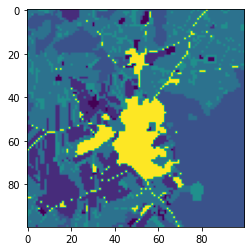

In [59]:
print(np.bincount(class_labels.flatten()))
plt.imshow(class_labels)

## load pre-processed data

In [ ]:
input_list = [
              '/content/tempcnn-example-sentinel2/toy_data/B02.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B03.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B04.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B08.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B11.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B12.tif'
              ]
print(input_list)

In [60]:
def inputs_to_npy(input_list):
    arr = []
    for fp in input_list:
        import rasterio
        with rasterio.open(fp) as src:
            a = src.read()
        arr.append(a)
    arr = np.stack(arr, axis=-1)
    return arr

inputs = inputs_to_npy(input_list)
inputs.shape, inputs.dtype

['/content/gdrive/MyDrive/B02.tif', '/content/gdrive/MyDrive/B03.tif', '/content/gdrive/MyDrive/B04.tif', '/content/gdrive/MyDrive/B08.tif', '/content/gdrive/MyDrive/B11.tif', '/content/gdrive/MyDrive/B12.tif']


((37, 100, 100, 6), dtype('uint8'))

In [76]:
i=0

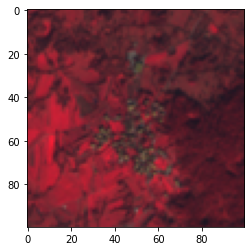

In [116]:
plt.imshow(inputs[i, :, :, [3,2,1]].swapaxes(0,1).swapaxes(1,2)*2)
i+=1

## build tempcnn and fit

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### prepare labels

In [63]:
y = class_labels.flatten()

# encoding of labels
classes = list(set(list(y)))
n_classes = len(classes)
le = LabelEncoder()
le.fit(classes)
y = le.transform(y)

# one-hot encoding of labels
y = to_categorical(y, len(list(set(list(y)))))[:10000]
y.shape

(10000, 6)

### prepare EO data

In [64]:
shp = inputs.shape
X = inputs.reshape(shp[0], shp[1]*shp[2], shp[3]).swapaxes(0,1)[:10000]
X.shape

(10000, 37, 6)

### split into train and test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=np.argmax(y, axis=1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 37, 6), (2500, 37, 6), (7500, 6), (2500, 6))

### Build model with tf.keras

In [118]:
X_train.shape

(7500, 37, 6)

In [125]:
# normalization layer
percentiles = np.nanpercentile(X_train.reshape(7500*37, 6), [2, 98], axis=0).round(3).astype('float32')
min_percentile = percentiles[0, :][np.newaxis, np.newaxis, :]
max_percentile = percentiles[1, :][np.newaxis, np.newaxis, :]
print(min_percentile, max_percentile)

[[[0. 0. 0. 0. 0. 0.]]] [[[37. 34. 37. 92. 77. 56.]]]


In [127]:
# preprocess: all in uint, normalize, clip

class Normalization(tf.keras.layers.Layer):
    def __init__(self):
        super(PreprocessInput, self).__init__(dtype='float32')
        self.min_per = min_percentile
        self.max_per = max_percentile

    def call(self, x, training=False):
        x = ((x-self.min_per) / (self.max_per-self.min_per))
        x = tf.cast(x, dtype='float32')
        x = tf.clip_by_value(x, clip_value_min=0, clip_value_max=1)

        return x

normalization = Normalization()
output = normalization(X)
output = output.numpy()
results_tf = output.shape, output.dtype, output.min(), output.mean(), output.max()
print(results_tf)

######### numpy ###################
def normalize_data(a, min_per, max_per):
    b = (a-min_per[np.newaxis, np.newaxis, :]) / (max_per-min_per)[np.newaxis, np.newaxis, :]
    return b

def clip_values(a):
    b = np.clip(a, 0, 1).astype(np.float32)
    return b


output = normalize_data(X, np.array(min_percentile).squeeze(), np.array(max_percentile).squeeze())
output = clip_values(output)
results_np = output.shape, output.dtype, output.min(), output.mean(), output.max()
print(results_np)

((10000, 37, 6), dtype('float32'), 0.0, 0.60540146, 1.0)
((10000, 37, 6), dtype('float32'), 0.0, 0.6054013, 1.0)


In [128]:
from tempcnn import *

def Archi_NORM_3CONV64_1FC256(X, nbclasses):

    #-- get the input sizes
    m, L, depth = X.shape
    input_shape = (L,depth)

    #-- parameters of the architecture
    l2_rate = 1.e-6
    dropout_rate = 0.5
    nb_conv = 3
    nb_fc= 1
    nbunits_conv = 64 #-- will be double
    nbunits_fc = 256 #-- will be double

    # Define the input placeholder.
    X_input = Input(input_shape)
    X = X_input

    # preprocess
    X = Normalization()(X)

    #-- nb_conv CONV layers
    X = X_input
    for add in range(nb_conv):
        X = conv_bn_relu_drop(X, nbunits=nbunits_conv, kernel_size=5, kernel_regularizer=l2(l2_rate), dropout_rate=dropout_rate)
    #-- Flatten + 	1 FC layers
    X = Flatten()(X)
    for add in range(nb_fc):	
        X = fc_bn_relu_drop(X, nbunits=nbunits_fc, kernel_regularizer=l2(l2_rate), dropout_rate=dropout_rate)
      
    #-- SOFTMAX layer
    out = softmax(X, nbclasses, kernel_regularizer=l2(l2_rate))
      
    # Create model.
    return Model(inputs = X_input, outputs = out, name='Archi_NORM_3CONV64_1FC256')

### Train TempCNN model

In [138]:
# training parameters
lr = 0.001
n_epochs = 30

In [139]:
model = Archi_NORM_3CONV64_1FC256(X, nbclasses=n_classes)
model.compile(optimizer=optimizers.Adam(lr), loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.25)

Epoch 1/30
176/176 [==============================] - 6s 29ms/step - loss: 1.2055 - accuracy: 0.5778 - val_loss: 1.0742 - val_accuracy: 0.6469
Epoch 2/30
176/176 [==============================] - 5s 26ms/step - loss: 0.8257 - accuracy: 0.7101 - val_loss: 0.6920 - val_accuracy: 0.7200
Epoch 3/30
176/176 [==============================] - 5s 27ms/step - loss: 0.7531 - accuracy: 0.7197 - val_loss: 0.6579 - val_accuracy: 0.7589
Epoch 4/30
176/176 [==============================] - 5s 28ms/step - loss: 0.6804 - accuracy: 0.7546 - val_loss: 0.6634 - val_accuracy: 0.7461
Epoch 5/30
176/176 [==============================] - 5s 27ms/step - loss: 0.6617 - accuracy: 0.7566 - val_loss: 0.6077 - val_accuracy: 0.7637
Epoch 6/30
176/176 [==============================] - 5s 27ms/step - loss: 0.6631 - accuracy: 0.7638 - val_loss: 0.5790 - val_accuracy: 0.7691
Epoch 7/30
176/176 [==============================] - 5s 28ms/step - loss: 0.6479 - accuracy: 0.7656 - val_loss: 0.6129 - val_accuracy: 0.7573

### Evaluate model on test set
val_accuracy: 0.7936

val_accuracy: 0.7780 - no norm

val_accuracy: 0.7904 - no norm

val_accuracy: 0.7936 - with norm 20

val_accuracy: 0.8149 - with norm 30

In [140]:
proba = model.predict(X_test)

y_test_original = le.inverse_transform(np.argmax(y_test, axis=-1))
pred_original = le.inverse_transform(np.argmax(proba, axis=-1))

cm = confusion_matrix(y_test_original, pred_original)
print(cm)

[[ 12   2   1  14   1  10]
 [  1 307   0  39   0  14]
 [  1   1 599  29   5   3]
 [  3  72  26 880   7  24]
 [  0   8  42  79  52   2]
 [  2  21   1  23   0 219]]


## predict map

In [141]:
shp = inputs.shape
X_all = inputs.reshape(shp[0], shp[1]*shp[2], shp[3])
X_all = X_all.swapaxes(0,1)
X_all.shape

(10000, 37, 6)

In [142]:
%%time
proba = model.predict(X_all)
pred_flat = le.inverse_transform(np.argmax(proba, axis=-1))
pred = pred_flat.reshape(shp[1], shp[2])
pred.shape

CPU times: user 2.23 s, sys: 87.9 ms, total: 2.32 s
Wall time: 1.42 s


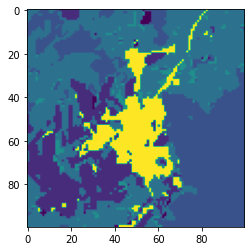

In [143]:
plt.imshow(pred)

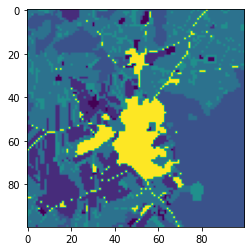

In [144]:
plt.imshow(class_labels)